In [400]:
# Librerias generales
import pandas as pd
import numpy as np
import sqlite3 as sql ### para conectarse a BD
from sklearn.impute import SimpleImputer
import plotly.express as px


# Librerias e visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [273]:
##Mostrar todas las columnas 
pd.options.display.max_columns = None

In [274]:
df_cronicos = pd.read_excel('RETO_df_cronicos.xlsx')
df_cronicos.head(2)

,YEAR,MES,Fecha diligenciamiento,Hora,Atencion,Ingreso,Tipo,NRODOC,Peso,Talla,IMC,Clasificacion IMC,SaturaciÃ³n de OxÃ­geno (%),PerÃ­metro Muslo,PerÃ­metro Cintura,Pliegue Triceps,Pliegue Abdomen,Pliegue Muslo,Sumatoria Pliegues,PresiÃ³n Arterial SistÃ³lica,PresiÃ³n Arterial DiastÃ³lica,Frecuencia CardÃ­aca en reposo,Auto-calificacion Nivel de Ejercicio,Constantes,METS -Ãndice MetabÃ³lico,VO2 - MÃ¡xima Cantidad de OxÃ­geno,Ãndice de Fragilidad Groningen,CalificaciÃ³n (Ãndice de Fragilidad),Tiempo en Segundos (Apoyo Monopodal),CalificaciÃ³n (Apoyo Monopodal),Tiempo en Segundos (Recorrer 5 metros),Velocidad (m/s),CalificaciÃ³n Velocidad,Test Findrisc,Ãndice Tobillo/Brazo,Observaciones,PresiÃ³n arterial registro medico,Diabetes Mellitus,Tipo diabetes mellitus,Es insulinorequiriente,Tiempo con el diagnÃ³stico,Glicemia,Fecha glicemia,Hemoglobina Glicada,Fecha hemoglobina glicosilada,Control Diabetes,Tiene riesgo de tener Diabetes Mellitus,Tiene HTA,Control HTA,Tiene riesgo de tener HTA,Tiempo con el diagnÃ³stico1,Tiene EPOC,Espirometria,VEF1/CVF,VEF1/VFC Posbroncodilatador,Gravedad,DiagnÃ³stico EPOC,Disnea MMRC,ClasificaciÃ³n,CAT,NÃºmero de exacerbaciones Ãºltimo aÃ±o (Que hayan necesitado hospitalizado),ClasificaciÃ³n GOLD,ClasificaciÃ³n1,ClasificaciÃ³n BODEX,OxÃ­geno dependiente,Tiene gases arteriales,Resultado,EPOC (ClasificaciÃ³n BODEX),Enfermedad Coronaria (En el Ãºltimo aÃ±o),Insuficiencia CardÃ­aca,ValvulopatÃ­a,Arritmia o paciente con dispositivo,Sufre de alguna enfermedad cardiovascular,Â¿CuÃ¡l?,Tabaquismo,Cuantos cigarrillos dÃ­a,AÃ±os de Consumo,Indice paquete/aÃ±o,Lipoproteina,Fecha LDL,HDL,Fecha HDL,Colesterol total,Fecha colesterol total,Trigliceridos,Fecha trigliceridos,ClasificaciÃ³n de Framinghan,Creatinina 1 consulta,Fecha creatinina1,Tasa de FiltraciÃ³n Glomerular TFG,Estadio de la Enfermedad Renal,Microalbuminuria,Fecha microalbuminuria,Hormona Estimulante de la Tiroides (TSH),Otras Morbilidades,Clase Funcional,Creatinina 2 consulta,Fecha creatinina2,Tasa de FiltraciÃ³n Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,ClasificaciÃ³n Cambio de TFG,Ãšltima mamografÃ­a,Ãšltima citologÃ­a,Ãšltima cita odontolÃ³gica,Ãšltima cita con OptometrÃ­a / OftallmologÃ­a,Ãšltimo PSA,Basciloscopia,Fecha basciloscopia,Ãšltima vacuna de influenza,Fecha Vacuna Neumococo,Fecha vacuna neumococo veintitrÃ©s valentes,Ãšlcera de pie diabÃ©tico,RemisiÃ³n,DiagnÃ³stico Principal,AnÃ¡lisis y conducta a seguir,Tiene prÃ³ximo control,Fecha PrÃ³ximo Control,Tipo control,Requiere cita de morbilidad,Fecha cita morbilidad,Ambito segÃºn el mÃ©dico,Diagnostico1,NombreDiagnostico1,Diagnostico2,NombreDiagnostico2,Diagnostico3,NombreDiagnostico3,Diagnostico4,NombreDiagnostico4,Diagnostico5,NombreDiagnostico5,Diagnostico6,NombreDiagnostico6,Diagnostico7,NombreDiagnostico7,Diagnostico8,NombreDiagnostico8,Diagnostico9,NombreDiagnostico9,Diagnostico10,NombreDiagnostico10,Diagnostico11,NombreDiagnostico11,Diagnostico12,NombreDiagnostico12,Diagnostico13,NombreDiagnostico13,Diagnostico14,NombreDiagnostico14,Diagnostico15,NombreDiagnostico15,Diagnostico16,NombreDiagnostico16,Diagnostico17,NombreDiagnostico17,Diagnostico18,NombreDiagnostico18,Diagnostico19,NombreDiagnostico19,Diagnostico20,NombreDiagnostico20,Diagnostico21,NombreDiagnostico21,Diagnostico22,NombreDiagnostico22,Diagnostico23,NombreDiagnostico23,Diagnostico24,NombreDiagnostico24,Diagnostico25,NombreDiagnostico25,Diagnostico26,NombreDiagnostico26,Diagnostico26.1,NombreDiagnostico26.1,Diagnostico27,NombreDiagnostico27,Diagnostico28,NombreDiagnostico28,Diagnostico29,NombreDiagnostico29,Diagnostico30,NombreDiagnostico30,Diagnostico31,NombreDiagnostico31,Diagnostico32,NombreDiagnostico32,Diagnostico33,NombreDiagnostico33,Diagnostico34,NombreDiagnostico34,Diagnostico35,NombreDiagnostico35,Diagnostico36,NombreDiagnostico36,Diagnostico37,NombreDiagnostico37,Diagnostico38,NombreDiagnostico38,Diagnostico39,NombreDiagnostico39,Diagnostico40,NombreDiagnostico40,Diagnostico41,NombreDiagnostico

In [277]:
df_cronicos = df_cronicos.rename(columns = {'SaturaciÃ³n de OxÃgeno (%)': 'Saturacion de Oxigeno (%)','PerÃmetro Muslo':'Perimetro Muslo','PerÃmetro Cintura':'Perimetro Cintura','PresiÃ³n Arterial SistÃ³lica':'Presion Arterial Sistelica','PresiÃ³n Arterial DiastÃ³lica':'Presion Arterial Diastelica','Frecuencia CardÃaca en reposo':'Frecuencia Cardiaca en reposo','METS -Ãndice MetabÃ³lico':'METS -indice Metabolico','VO2 -MÃ¡xima Cantidad de OxÃgeno':'VO2 -Maxima Cantidad de Oxigeno','Ãndice de Fragilidad Groningen':'indice de Fragilidad Groningen','CalificaciÃ³n (Ãndice de Fragilidad)':'Calificacion (indice de Fragilidad)','FrÃ¡gil':'Fragil','CalificaciÃ³n (Apoyo Monopodal)':'Calificacion (Apoyo Monopodal)'} )

In [278]:
df_cronicos = df_cronicos.iloc[:,:122]
df_cronicos.head(2)

,YEAR,MES,Fecha diligenciamiento,Hora,Atencion,Ingreso,Tipo,NRODOC,Peso,Talla,IMC,Clasificacion IMC,SaturaciÃ³n de OxÃ­geno (%),PerÃ­metro Muslo,PerÃ­metro Cintura,Pliegue Triceps,Pliegue Abdomen,Pliegue Muslo,Sumatoria Pliegues,Presion Arterial Sistelica,Presion Arterial Diastelica,Frecuencia CardÃ­aca en reposo,Auto-calificacion Nivel de Ejercicio,Constantes,METS -indice Metabolico,VO2 - MÃ¡xima Cantidad de OxÃ­geno,indice de Fragilidad Groningen,Calificacion (indice de Fragilidad),Tiempo en Segundos (Apoyo Monopodal),Calificacion (Apoyo Monopodal),Tiempo en Segundos (Recorrer 5 metros),Velocidad (m/s),CalificaciÃ³n Velocidad,Test Findrisc,Ãndice Tobillo/Brazo,Observaciones,PresiÃ³n arterial registro medico,Diabetes Mellitus,Tipo diabetes mellitus,Es insulinorequiriente,Tiempo con el diagnÃ³stico,Glicemia,Fecha glicemia,Hemoglobina Glicada,Fecha hemoglobina glicosilada,Control Diabetes,Tiene riesgo de tener Diabetes Mellitus,Tiene HTA,Control HTA,Tiene riesgo de tener HTA,Tiempo con el diagnÃ³stico1,Tiene EPOC,Espirometria,VEF1/CVF,VEF1/VFC Posbroncodilatador,Gravedad,DiagnÃ³stico EPOC,Disnea MMRC,ClasificaciÃ³n,CAT,NÃºmero de exacerbaciones Ãºltimo aÃ±o (Que hayan necesitado hospitalizado),ClasificaciÃ³n GOLD,ClasificaciÃ³n1,ClasificaciÃ³n BODEX,OxÃ­geno dependiente,Tiene gases arteriales,Resultado,EPOC (ClasificaciÃ³n BODEX),Enfermedad Coronaria (En el Ãºltimo aÃ±o),Insuficiencia CardÃ­aca,ValvulopatÃ­a,Arritmia o paciente con dispositivo,Sufre de alguna enfermedad cardiovascular,Â¿CuÃ¡l?,Tabaquismo,Cuantos cigarrillos dÃ­a,AÃ±os de Consumo,Indice paquete/aÃ±o,Lipoproteina,Fecha LDL,HDL,Fecha HDL,Colesterol total,Fecha colesterol total,Trigliceridos,Fecha trigliceridos,ClasificaciÃ³n de Framinghan,Creatinina 1 consulta,Fecha creatinina1,Tasa de FiltraciÃ³n Glomerular TFG,Estadio de la Enfermedad Renal,Microalbuminuria,Fecha microalbuminuria,Hormona Estimulante de la Tiroides (TSH),Otras Morbilidades,Clase Funcional,Creatinina 2 consulta,Fecha creatinina2,Tasa de FiltraciÃ³n Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,ClasificaciÃ³n Cambio de TFG,Ãšltima mamografÃ­a,Ãšltima citologÃ­a,Ãšltima cita odontolÃ³gica,Ãšltima cita con OptometrÃ­a / OftallmologÃ­a,Ãšltimo PSA,Basciloscopia,Fecha basciloscopia,Ãšltima vacuna de influenza,Fecha Vacuna Neumococo,Fecha vacuna neumococo veintitrÃ©s valentes,Ãšlcera de pie diabÃ©tico,RemisiÃ³n,DiagnÃ³stico Principal,AnÃ¡lisis y conducta a seguir,Tiene prÃ³ximo control,Fecha PrÃ³ximo Control,Tipo control,Requiere cita de morbilidad,Fecha cita morbilidad,Ambito segÃºn el mÃ©dico
0,2017,OCTUBRE,2017-10-02,9:00:20 a. m.,3912499,2629714,CC,311144,69.0,155.0,28.72,Sobrepeso,91.0,51.0,109.0,10.0,25.0,5.0,40.0,140,77,66,3,1.06,63376.0,221816.0,3.0,FrÃ¡gil,15,Aceptable,5,1.00,Aceptable,Alta Probabilidad de Diabetes,NaN,NaN,NaN,Si,ND,ND,ND,0.0,ND,8.15,ND,No controlada,No aplica,Si,Controlada,No aplica,ND,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leve,No aplica,No aplica,No,No,No,NaN,Si,ND,NaN,NaN,60.68,ND,53.95,ND,128.0,ND,67.33,ND,Bajo riesgo,0.68,ND,63.49,Estadio 2,56.55,ND,5.05,NaN,Clase funcional 2B,0.0,ND,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMARIA),ESTADIO RENAL 2 A3?RCV a 10 aÃ±os MODERADO **C...,ND,2018-01-02,Sin dato,ND,ND,Ambulatorio
1,2017,OCTUBRE,2017-10-02,9:04:33 a. m.,3942247,2629726,CC,308418,62.0,155.0,25.81,Sobrepeso,94.0,60.0,89.0,25.0,35.0,20.0,80.0,181,143,90,2,0.32,41023.0,14358.0,6.0,FrÃ¡gil,1,Malo - Fragil,7,0.71,Deficiente,Alta Probabilidad de Diabetes,NaN,NaN,NaN,No,ND,ND,ND,98.0,ND,0.00,ND,No aplica,NaN,Si,No controlada,No aplica,ND,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderada,No aplica,No aplica,No,No,No,NaN,No,ND,NaN,NaN,92.00,ND,45.00,ND,157.0,ND,103.00,ND,Alto riesgo,0.85,ND,58.56,Estadio 3A,0.00,ND,4.65,NaN,Clase funcional 2A,0.0,ND,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,No,Grupal 2,I10X - HIPERTENSION ESENCIAL (PRIMARIA),"

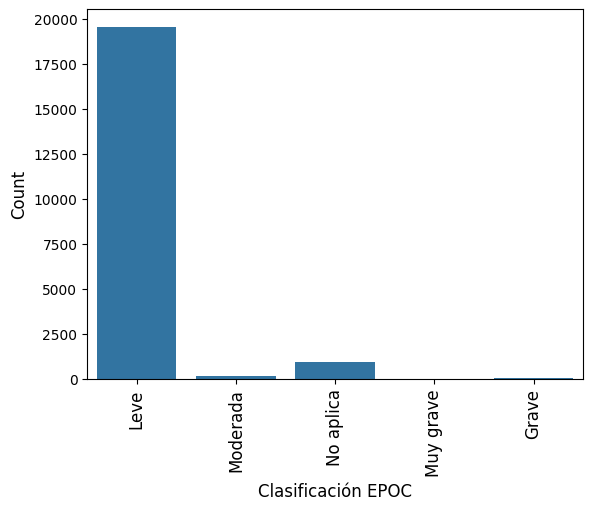

In [5]:
ax = sns.countplot(x='EPOC (ClasificaciÃ³n BODEX)',   data= df_cronicos)
plt.xlabel('Clasificación EPOC', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

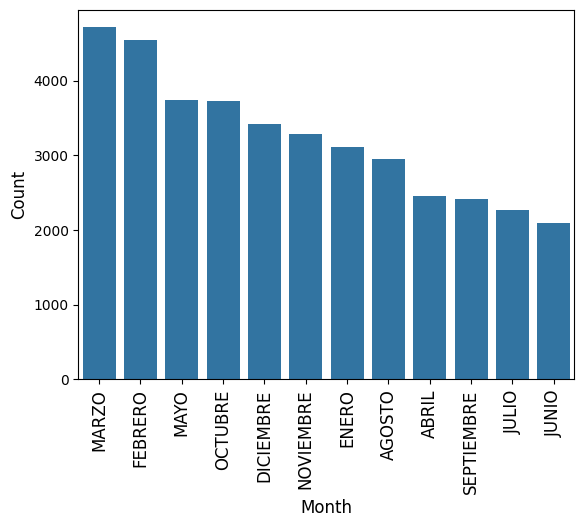

In [45]:
ax = sns.barplot(x=df_cronicos['MES'].value_counts().index,   y=df_cronicos['MES'].value_counts())
plt.xlabel('Month', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

In [7]:
df_diagnosticos = df_cronicos.groupby(['DiagnÃ³stico Principal']).agg(encounters = ('NRODOC', 'count')).reset_index().sort_values(['encounters'], ascending = False)
df_diagnosticos10 = df_diagnosticos.head(10)

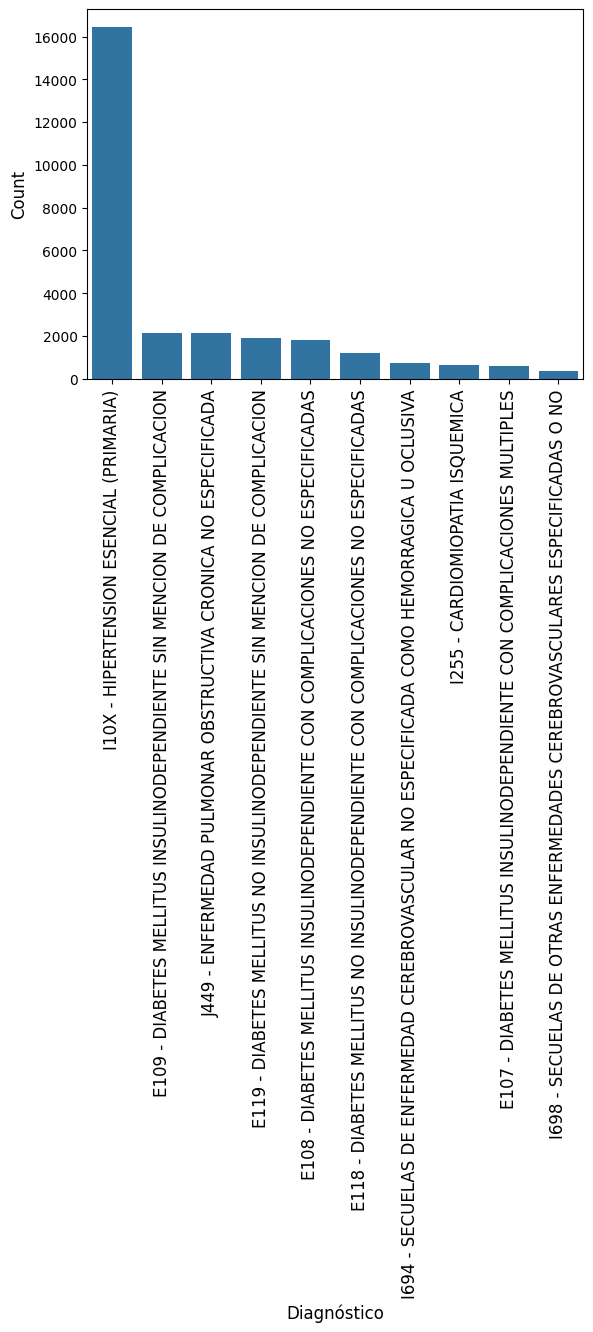

In [8]:
ax = sns.barplot(x=df_diagnosticos10['DiagnÃ³stico Principal'].value_counts().index,   y=df_diagnosticos10['encounters'])
plt.xlabel('Diagnóstico', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.show()

In [283]:
df_usuarios = pd.read_csv('RETO_df_usuarios.csv', sep= ',')
df_usuarios.head(2)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13640\1769557378.py:1: DtypeWarning:

Columns (4,6,7,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.



,MES,YEAR,NRODOC,SEXO,FECHA NACIMIENTO,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,FECHA PRIMERA CLASE FUNCIONAL,PRIMERA CLASE FUNCIONAL,FECHA ÚLTIMA CLASE FUNCIONAL,ÚLTIMA CLASE FUNCIONAL,CICLO_VITAL,QUINQUENIO
0,ABRIL,2017,306221,F,1938-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABRIL,2017,306222,F,1974-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
# Convertir la columna 'FechaNacimiento' a tipo datetime
df_usuarios['FECHA NACIMIENTO'] = pd.to_datetime(df_usuarios['FECHA NACIMIENTO'])

# Calcular la edad y agregarla como una nueva columna
df_usuarios['Edad'] = 2023 - df_usuarios['FECHA NACIMIENTO'].dt.year

## relleno los nulos de edad con la linea anterior
df_usuarios['EDAD'].fillna(df_usuarios['Edad'], inplace=True)

In [285]:
df_usuarios['EDAD'].isnull().sum()

4746

In [294]:
#Definir imputer para variables numéricas
imp_num = SimpleImputer(strategy='most_frequent')
#Ajustar imputer y transformar las variables con valores null
df_usuarios['EDAD']= imp_num.fit_transform(df_usuarios['EDAD'].values.reshape(-1,1))

In [295]:
df_usuarios['EDAD'].isnull().sum()

0

In [280]:
##Se verifican las categorías de la columna sexo 
df_usuarios['SEXO'].value_counts()


SEXO
F                                       115303
M                                        68584
CARRERA 51 B 1 33                            1
CL 48  95 55                                 1
CR 49 46 14                                  1
CRR 47 N  41 32                              1
CALLE 80 A 71 A 18                           1
CL 94  74B  16                               1
CALLE 77E   8830                             1
KR 55A 47 16  BR SANTA ANA                   1
KR 92 NRO 46 97                              1
CL 55 80 54                                  1
CALLE 38 SUR N  29 A 54 PISO 2               1
CR 75A   88A   27 BRR ROBLEDO KENEDY         1
CL  40 C  SUR   29 C  31LA FLORIDA           1
Name: count, dtype: int64

In [286]:
# Agrupar por 'NRODOC' y asignar el mismo sexo a todas las filas del mismo grupo
df_usuarios['SEXO'] = df_usuarios.groupby('NRODOC')['SEXO'].transform('first')

In [287]:
df_usuarios['SEXO'].value_counts()

SEXO
F                   115315
M                    68588
CL 31 NRO 44 159         1
Name: count, dtype: int64

In [288]:
df_usuarios[df_usuarios['NRODOC'] == 311233]

## se verifica este usuario para observar si no tenia datos en sexo
df_usuarios[df_usuarios['NRODOC'] == 311227]



,MES,YEAR,NRODOC,SEXO,FECHA NACIMIENTO,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,FECHA PRIMERA CLASE FUNCIONAL,PRIMERA CLASE FUNCIONAL,FECHA ÚLTIMA CLASE FUNCIONAL,ÚLTIMA CLASE FUNCIONAL,CICLO_VITAL,QUINQUENIO,Edad
5006,ABRIL,2017,311227,None,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63088,ABRIL,2017,311227,None,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
## se procede a eliminar este usuario ya que no tiene un sexo para definirlo
df_usuarios = df_usuarios.drop(df_usuarios[df_usuarios['NRODOC'] == 311233].index)

### se cambian los nulos de sexo por la cadena de texto NaN para su posterior eliminación
df_usuarios['SEXO'] = df_usuarios['SEXO'].fillna('NaN')


### Eliminar filas con valores nulos
df_usuarios = df_usuarios.drop(df_usuarios[df_usuarios['SEXO'] == 'NaN'].index)

In [124]:
df_usuarios['SEXO']=df_usuarios['SEXO'].replace({'CARRERA 51 B 1 33':'M','CL 48  95 55':'F','CR 49 46 14':'F','CRR 47 N  41 32':'F','CALLE 80 A 71 A 18':'F','CL 94  74B  16':'F','CALLE 77E   8830':'F','KR 55A 47 16  BR SANTA ANA':'F','KR 92 NRO 46 97':'F','CL 55 80 54':'M','CALLE 38 SUR N  29 A 54 PISO 2':'M','CR 75A   88A   27 BRR ROBLEDO KENEDY':'M','CL  40 C  SUR   29 C  31LA FLORIDA':'F','NaN':'F'})

In [291]:
# Función para agrupar edades en categorías usando if
def agrupar_edad(edad):
    if edad < 6:
        return 'Primera infancia'
    elif edad < 12:
        return 'Infancia'
    elif edad < 18:
        return 'Adolescencia'
    elif edad < 29:
        return 'Juventud'
    elif edad < 60:
        return 'Adultez'
    else:
        return 'Vejez'

# Aplicar la función a la columna 'edad' y crear una nueva columna 'Grupo de edad'
df_usuarios['CICLO_VITAL'] = df_usuarios['EDAD'].apply(agrupar_edad)

In [292]:
df_usuarios['CICLO_VITAL'].value_counts()


CICLO_VITAL
Vejez           162773
Adultez          19409
Juventud          1715
Adolescencia         4
Infancia             2
Name: count, dtype: int64

In [293]:
df_usuarios['CICLO_VITAL'].isnull().sum()

0

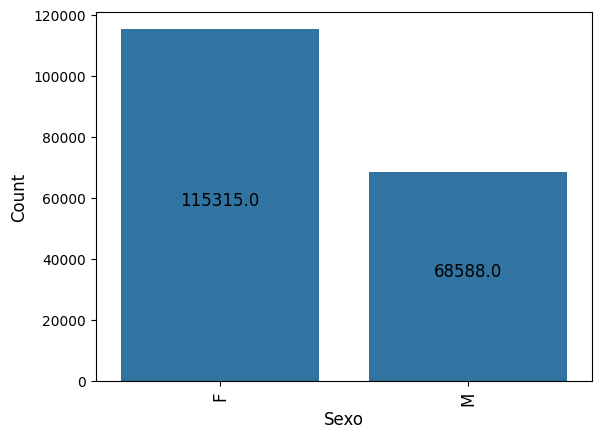

In [211]:
## Gráfico del sexo


ax = sns.countplot(x='SEXO',   data= df_usuarios)
plt.xlabel('Sexo', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', size=12)
plt.show()

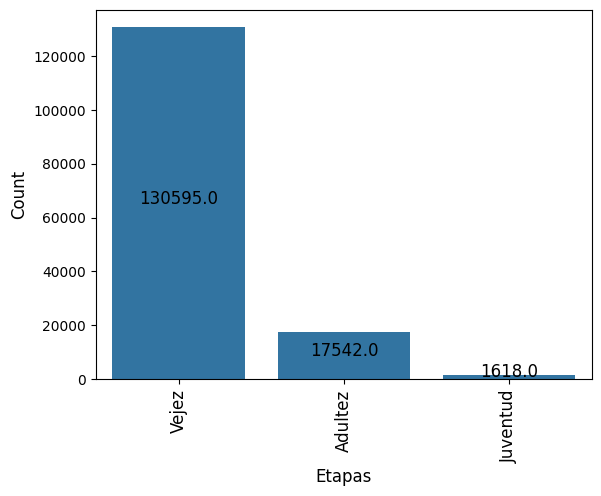

In [212]:
## Gráfico ciclo de vida

ax = sns.countplot(x='CICLO_VITAL',   data= df_usuarios)
plt.xlabel('Etapas', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', size=12)
plt.show()

In [333]:
df_egresos = pd.read_excel('RETO_df_egresos.xlsx')
df_egresos.head(2)

,YEAR,MES,NRO ATENCION,NRO INGRESO,SERVICIO HABILITADO COD,SERVICIO HABILITADO,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN AFILIACION,EPS VALIDADA,MODALIDAD CONTRATO,FUENTE FINANCIACION1,FUENTE FINANCIACION2,SERVICIO ADMITE,BLOQUE ANTERIOR,PISO ANTERIOR,SERVICIO ANTERIOR,NRO CAMA ANTERIOR,VIA INGRESO,BLOQUE,UNIDAD ESTRATEGICA,PISO,NRO CAMA,SERVICIO EGRESO,TIPO EGRESO,FECHA INGRESO CLINICA,FECHA INGRESO SERVICIO,FECHA POSIBLE ALTA,FECHA ALTA MEDICA,FECHA RECAUDO,FECHA CAMILLERO,FECHA ENFERMERIA,FECHA FACTURACION AUDIFARMA,FECHA FARMACIA,FECHA SALIDA,FECHA ASEO,DEMORA ASIGNACION CAMA,DEMORA APLICACION MEDICAMENTO,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,ALTA MEDICA,POSIBLE ALTA,DXPRINCIPAL EGRESO COD,DXPRINCIPAL EGRESO,DX RELACIONADO1 COD,DX RELACIONADO1,DX RELACIONADO2 COD,DX RELACIONADO2,DX RELACIONADO3 COD,DX RELACIONADO3,TIPO DIAGNOSTICO PRINCIPAL,PERTINENCIA DIAGNOSTICA,DX PRINCIPAL EGRESO CATEGORIA COD,DX PRINCIPAL EGRESO CATEGORIA,DX PRINCIPAL EGRESO CAPITULO COD,DX PRINCIPAL EGRESO CAPITULO,CAUSA BASICA MUERTE COD,CAUSA BASICA MUERTE,CAUSA BASICA CATEGORIA COD,CAUSA BASICA CATEGORIA,CAUSA BASICA CAPITULO COD,CAUSA BASICA CAPITULO,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,2017,MAYO,3433964,1899917,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin informaciÃ³n,NaN,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Sin informacion en Base de datos,Sin Informacion,Hospitalizacion Adultos,Sin Informacion,Sin Informacion,Sin Informacion,Sin informaciÃ³n,NaN,NaN,NaN,2017-05-17 09:03:57.637,NaN,NaN,NaN,NaN,NaN,2017-05-17 10:55:02.000,NaN,00:00:00,00:00:00,0.0,NO,NO,Sin Informacion,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J984,OTROS TRASTORNOS DEL PULMON,J432,ENFISEMA CENTROLOBULAR,J981,COLAPSO PULMONAR,Sin Informacion,NaN,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
1,2017,DICIEMBRE,3720631,2018136,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin informaciÃ³n,NaN,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Sin informacion en Base de datos,Sin Informacion,Hospitalizacion Adultos,Sin Informacion,Sin Informacion,Sin Informacion,Sin informaciÃ³n,NaN,NaN,NaN,2017-12-07 09:35:27.147,NaN,NaN,NaN,NaN,NaN,2017-12-07 11:06:49.000,NaN,00:00:00,00:00:00,0.0,NO,NO,Sin Informacion,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J960,INSUFICIENCIA RESPIRATORIA AGUDA,I110,ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIE...,I270,HIPERTENSION PULMONAR PRIMARIA,Sin Informacion,NaN,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna


In [327]:
df_egresos['SERVICIO ADMITE'].value_counts()

SERVICIO ADMITE
Urgencias Generales Sótano          2892
Hospitalización                     1393
Urgencias Generales Piso 1           209
Cirugía                               91
Urgencias Maternas                    28
Ambulatoria Personal                  23
Sin informacion en Base de datos       6
Ambulatoria Programada                 3
Name: count, dtype: int64

In [328]:
fig  = px.histogram(df_egresos, x= 'SERVICIO ADMITE', title= 'Hist frecuencia de tipo de servicio por usuario')
fig.show()

In [19]:
df_egresos['UNIDAD ESTRATEGICA'].value_counts()

UNIDAD ESTRATEGICA
Hospitalizacion Adultos         3777
Urgencias                        734
UCI Adultos                       79
CUIDADOS ESPECIALES               51
Apoyo Terapeutico                  2
Hospitalizacion Domiciliaria       2
Name: count, dtype: int64

In [20]:
fig  = px.histogram(df_egresos, x= 'UNIDAD ESTRATEGICA', title= 'Hist frecuencia de unidad estrategica por usuario')
fig.show()

In [21]:
df_egresos['REGIMEN AFILIACION'].value_counts()

REGIMEN AFILIACION
Contributivo       2995
Sin información    1641
Subsidiado            8
Particular            1
Name: count, dtype: int64

In [69]:
fig = px.pie(df_egresos , values = 'NRODOC', names = 'REGIMEN AFILIACION', title = '<b>% REGIMEN AFILIACION POR USUARIO<b>')
# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    legend_title = 'REGIMEN AFILIACION POR USUARIO',
    title_x = 0.5)

fig.show()

In [23]:
 #Se muestra el tamaño de cada base cargada
print(df_cronicos.shape)
print(df_usuarios.shape)
print(df_egresos.shape)

(38717, 122)
(183910, 16)
(6376, 66)


In [335]:
df_egresos.isnull().sum()

YEAR                               0
MES                                0
NRO ATENCION                       0
NRO INGRESO                        0
SERVICIO HABILITADO COD            0
                                ... 
CAUSA BASICA CATEGORIA             0
CAUSA BASICA CAPITULO COD       5812
CAUSA BASICA CAPITULO              0
PROFESIONAL ESPECIALIDAD           0
PROFESIONAL ESPECIALIDAD GRD       0
Length: 66, dtype: int64

In [27]:
df_cronicos.isnull().sum()

YEAR                               0
MES                                0
Fecha diligenciamiento             0
Hora                               0
Atencion                           0
                               ...  
Fecha PrÃ³ximo Control         14557
Tipo control                   14281
Requiere cita de morbilidad    13572
Fecha cita morbilidad          23849
Ambito segÃºn el mÃ©dico       13069
Length: 122, dtype: int64

In [297]:
##Eliminar las columnas que contienen más de un umbral de valores nulos.
##El umbral se definió en 0,2 porque consideramos que las columnas que tengan mas del 80 por ciento de sus datos nulos no aportan al desarrollo del modelo
def eliminar_columnas_con_nulos(df, umbral=0.2):
    
    # Calcula la proporción de valores nulos en cada columna
    proporciones_nulos = df.isnull().mean()
    
    # Filtra las columnas que tienen un porcentaje de valores nulos mayor que el umbral
    columnas_a_eliminar = proporciones_nulos[proporciones_nulos > umbral].index
    
    # Elimina las columnas con valores nulos
    df_sin_nulos = df.drop(columns=columnas_a_eliminar)
    
    return df_sin_nulos


In [ ]:
##Eliminar las columnas de df_cronicos que contengan mas del 80% de nulos
cronicos = eliminar_columnas_con_nulos(df_cronicos)
cronicos.head(3)

In [30]:
nuloscronicos=cronicos.isnull().sum().sort_values(ascending=False)
nuloscronicos.head(20)

Tiempo con el diagnÃ³stico1       7003
Fecha microalbuminuria            4819
Fecha hemoglobina glicosilada     3631
Ãšlcera de pie diabÃ©tico         3505
Estadio de la Enfermedad Renal    3248
Fecha glicemia                    2454
Fecha trigliceridos               2323
Fecha colesterol total            2274
Fecha HDL                         2249
Fecha creatinina1                 1786
DiagnÃ³stico Principal            1350
AnÃ¡lisis y conducta a seguir     1076
Microalbuminuria                  1053
Colesterol total                  1053
Clase Funcional                   1053
Tabaquismo                        1053
Cambio de TFG                     1053
HDL                               1053
Creatinina 2 consulta             1053
Lipoproteina                      1053
dtype: int64

In [ ]:
cronicos.info()

In [ ]:
cronicos.dtypes.head(20)

In [301]:
##Eliminar las columnas de df_usuarios que contengan mas del 80% de nulos
usuarios = eliminar_columnas_con_nulos(df_usuarios)
usuarios.head()

,MES,YEAR,NRODOC,SEXO,EDAD,CICLO_VITAL,QUINQUENIO
0,ABRIL,2017,306221,F,85.0,Vejez,NaN
1,ABRIL,2017,306222,F,49.0,Adultez,NaN
2,ABRIL,2017,306223,F,93.0,Vejez,NaN
3,ABRIL,2017,306224,F,44.0,Adultez,NaN
4,ABRIL,2017,306225,M,80.0,Vejez,NaN


In [302]:
nulosusuarios=usuarios.isnull().sum().sort_values(ascending=False)
nulosusuarios

QUINQUENIO     34148
MES                0
YEAR               0
NRODOC             0
SEXO               0
EDAD               0
CICLO_VITAL        0
dtype: int64

In [303]:
#Eliminar las columnas CICLO_VITAL y QUINQUENIO ya que aportan información sobre la edad separada por categorías
usuarios2 = usuarios.drop(['QUINQUENIO'], axis = 1)

In [304]:
usuarios2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183903 entries, 0 to 183910
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   MES          183903 non-null  object 
 1   YEAR         183903 non-null  int64  
 2   NRODOC       183903 non-null  int64  
 3   SEXO         183903 non-null  object 
 4   EDAD         183903 non-null  float64
 5   CICLO_VITAL  183903 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.8+ MB


In [305]:
usuarios2.isnull().sum()

MES            0
YEAR           0
NRODOC         0
SEXO           0
EDAD           0
CICLO_VITAL    0
dtype: int64

In [354]:
##Eliminar las columnas de df_egresos que contengan mas del 80% de nulos
egresos = eliminar_columnas_con_nulos(df_egresos)
egresos.head()

,YEAR,MES,NRO ATENCION,NRO INGRESO,SERVICIO HABILITADO COD,SERVICIO HABILITADO,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN AFILIACION,MODALIDAD CONTRATO,FUENTE FINANCIACION1,FUENTE FINANCIACION2,SERVICIO ADMITE,BLOQUE ANTERIOR,PISO ANTERIOR,SERVICIO ANTERIOR,NRO CAMA ANTERIOR,VIA INGRESO,BLOQUE,UNIDAD ESTRATEGICA,PISO,NRO CAMA,SERVICIO EGRESO,TIPO EGRESO,FECHA ALTA MEDICA,FECHA SALIDA,DEMORA ASIGNACION CAMA,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,ALTA MEDICA,POSIBLE ALTA,DXPRINCIPAL EGRESO COD,DXPRINCIPAL EGRESO,DX RELACIONADO1 COD,DX RELACIONADO1,DX RELACIONADO2 COD,DX RELACIONADO2,DX RELACIONADO3 COD,DX RELACIONADO3,TIPO DIAGNOSTICO PRINCIPAL,DX PRINCIPAL EGRESO CATEGORIA COD,DX PRINCIPAL EGRESO CATEGORIA,DX PRINCIPAL EGRESO CAPITULO COD,DX PRINCIPAL EGRESO CAPITULO,CAUSA BASICA MUERTE,CAUSA BASICA CATEGORIA,CAUSA BASICA CAPITULO,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,2017,MAYO,3433964,1899917,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Sin informacion en Base de datos,Sin Informacion,Hospitalizacion Adultos,Sin Informacion,Sin Informacion,Sin Informacion,Sin informaciÃ³n,2017-05-17 09:03:57.637,2017-05-17 10:55:02.000,00:00:00,0.0,NO,NO,Sin Informacion,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J984,OTROS TRASTORNOS DEL PULMON,J432,ENFISEMA CENTROLOBULAR,J981,COLAPSO PULMONAR,Sin Informacion,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,Sin informacion en base de datos,Sin informacion en base de datos,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
1,2017,DICIEMBRE,3720631,2018136,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Sin informaciÃ³n,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Sin informacion en Base de datos,Sin Informacion,Hospitalizacion Adultos,Sin Informacion,Sin Informacion,Sin Informacion,Sin informaciÃ³n,2017-12-07 09:35:27.147,2017-12-07 11:06:49.000,00:00:00,0.0,NO,NO,Sin Informacion,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J960,INSUFICIENCIA RESPIRATORIA AGUDA,I110,ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIE...,I270,HIPERTENSION PULMONAR PRIMARIA,Sin Informacion,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,Sin informacion en base de datos,Sin informacion en base de datos,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
2,2018,FEBRERO,3912821,2159592,501.0,Urgencias >= 24 horas,CC,308185,1937-07-18 00:00:00.000,Contributivo,PGP,NUEVA EPS,NUEVA EPS,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Urgencias,Bloque 3,Urgencias,Urgencias,FST101,Fast track 1,Alta MÃ©dica,2018-02-22 13:05:00.000,2018-02-22 13:21:18.000,00:00:00,0.0,NO,SI,SI,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J980,ENFERMEDADES DE LA TRAQUEA Y DE LOS BRONQUIOS ...,I10X,HIPERTENSION ESENCIAL (PRIMARIA),E872,ACIDOSIS,Repetido,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,Sin informacion en base de datos,Sin informacion en base de datos,Sin informacion en base de datos,Medicina Interna,Urgentologia
3,2018,MAYO,4023613,2254075,501.0,Urgencias >= 24 horas,CC,308185,1937-07-18 00:00:00.000,Contributivo,PGP,NUEVA EPS,NUEVA EPS,Urgencias Generales SÃ³tano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Urgencias,Bloque 3,Urgencias,Urgencias,ERA109,ERA 1,Alta MÃ©dica,2018-05-20 16:07:29.677,2018-05-20 16:14:41.000,00:00:00,0.0,NO,NO,Sin Informacion,Sin Informacion,I110,ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIE...,I270,HIPERTENSION PULMONAR PRIMARIA,J44

In [393]:
# ax = sns.barplot(x=egresos['UNIDAD ESTRATEGICA'].value_counts().index,   y=egresos['UNIDAD ESTRATEGICA'].value_counts())
# plt.xlabel('UNIDAD ESTRATEGICA', size = 12)
# plt.xticks(rotation=90, size = 12)
# plt.ylabel('Count', size = 12)
# plt.show()
fig = px.treemap(egresos, path=['UNIDAD ESTRATEGICA'], values='NRODOC') 
fig.show()



In [357]:
egresos['UNIDAD ESTRATEGICA'].value_counts()

UNIDAD ESTRATEGICA
Hospitalizacion Adultos          5227
Urgencias                         978
UCI Adultos                        99
CUIDADOS ESPECIALES                65
Apoyo Terapeutico                   3
Hospitalizacion Domiciliaria        2
Apoyo Diagnostico Ambulatorio       2
Name: count, dtype: int64

In [ ]:
egresos.isnull().sum()

In [342]:
egresos.shape

(6376, 51)

In [41]:
cronicos.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
YEAR,38717.0,NaN,NaN,NaN,2020.178242,2017.0,2018.0,2021.0,2021.0,2022.0,1.733891
MES,38717,12,MARZO,4712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fecha diligenciamiento,38717,NaN,NaN,NaN,2020-08-28 05:13:58.980292864,2017-10-02 00:00:00,2018-09-19 00:00:00,2021-06-24 00:00:00,2021-12-22 00:00:00,2022-05-31 00:00:00,NaN
Hora,38717,30961,11:12:08 a.m.,649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atencion,38717.0,NaN,NaN,NaN,5047904.406824,3408530.0,4255222.0,5377653.0,5800403.0,6125234.0,823072.365209
...,...,...,...,...,...,...,...,...,...,...,...
Cambio de TFG,37664.0,NaN,NaN,NaN,0.035614,-219.11,0.0,0.0,0.0,244.86,3.908773
Ãšlcera de pie diabÃ©tico,35212,2,No,34736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RemisiÃ³n,37664,4,Grupal 2,20518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiagnÃ³stico Principal,37367,357,I10X - HIPERTENSION ESENCIAL (PRIMARIA),16459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Cuántos pacientes se tienen en el df?
print('Se tienen', len(usuarios['NRODOC'].unique()), 'pacientes únicos en los datos.')

Se tienen 8067 pacientes únicos en los datos.


In [ ]:
# Cuántas admisiones hospitalarias se tienen en el df?
print('Se tienen', len(usuarios['encounter_id'].unique()), 'admisiones únicas en los datos.')